# ph recognition based on the image color
 ***
 
 ### I downloaded ph-scale images from [link](https://www.shutterstock.com/search/ph+scale). Then I split every image to 15 small ones and I labeled it based on the ph

In [1]:
import cv2 # for images
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn import svm
from sklearn.externals import joblib

pd.set_option('display.max_columns', None)

data_dir = 'C:\\Users\\asus\\Desktop\\data_science_python\\ph_project\\ph_datasets\\'

In [2]:
PH_COUNT = 15
images_list = []
PH_DATASETS = 7
# add image to list in format [blue, green, red, label=ph]
for j in range(PH_DATASETS):
    for i in range(PH_COUNT):
        image = cv2.imread(data_dir + 'ph{}\\{}.jpg'.format(j+1, i))
        images_list.append([image[3][3][0],image[3][3][1],image[3][3][2],i])

# transform data to pandas DataFrame
df = pd.DataFrame(np.asarray(images_list),columns=['blue','green','red','label'])
df = shuffle(df)
# df.head(-1)

In [3]:
y = np.array(df['label']) 
X = np.array(df.drop(['label'], axis=1))
print(y)

[ 8 11  7  6  4 12  9  2 12  8  5  7  9 14 13  9  0  4  4  5  9 11  2  3
  8 14  1  0  6  3  2  0 10 13  6 12 11 12  4  3  4  8  6  3  5  1  7  0
  3  2  6  7  2  8 13  1  5  9 13 11 12 12  9  8 13 10 14 10 14  6  5  0
 10  3  7  1  9 10  1  5  4  4  5 14  3  1  8 11  1 14  6 11 13 12 13  2
  2 10  7  0 10  7 14 11  0]


# Plotting 

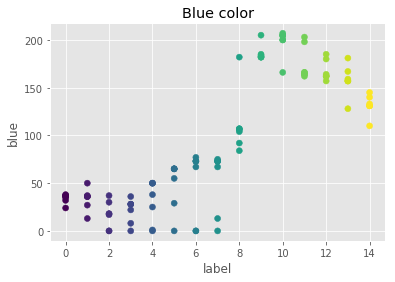

In [28]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.scatter(df.label, df.blue, c=df.label)
plt.xlabel('label')
plt.ylabel('blue')
plt.title('Blue color')
plt.show()

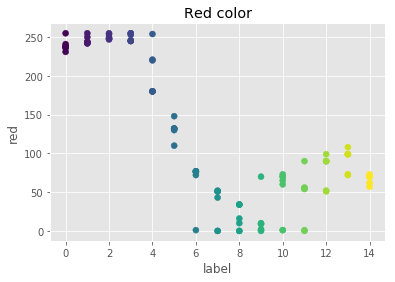

In [29]:
plt.scatter(df.label, df.red, c=df.label)
plt.xlabel('label')
plt.ylabel('red')
plt.title('Red color')
plt.show()

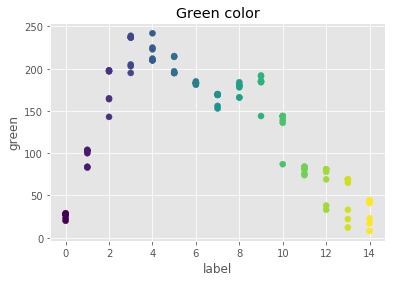

In [30]:
plt.scatter(df.label, df.green, c=df.label)
plt.xlabel('label')
plt.ylabel('green')
plt.title('Green color')
plt.show()

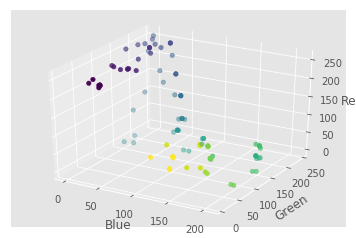

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.blue, df.green, df.red, c=df.label)
ax.set_xlabel('Blue')
ax.set_ylabel('Green')
ax.set_zlabel('Red')

plt.show()
fig.savefig('plot3d_v1.png')

# test and train data 

In [4]:
SIZE = X.shape[0]
TRAIN_SIZE = int(SIZE*0.9)
train_x = X[:TRAIN_SIZE]
train_y = y[:TRAIN_SIZE]
test_x = X[TRAIN_SIZE:]
test_y = y[TRAIN_SIZE:]
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((94, 3), (11, 3), (94,), (11,))

# Testing machine learning algorithms

***


#### GradientBoostingRegressor

In [5]:
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
# clf = GradientBoostingRegressor()
# clf.fit(train_x, train_y)

#### RandomForestRegressor

In [6]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
clf = RandomForestRegressor()
clf.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### GradientBoostingRegressor with tuning

In [7]:
clf = GradientBoostingRegressor(loss='lad', learning_rate=0.2,
                               max_depth=4,)
clf.fit(train_x, train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='lad', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [8]:
from sklearn.metrics import r2_score
# testing 
accuracy = 0
for i in range(len(test_x)):
    y_predict = clf.predict([test_x[i]])
    print('Predict {:.2f}, labels {}'.format(y_predict[0],test_y[i]))
    # add some margin
    if(abs(y_predict[0] - test_y[i]) <= 0.3):
        accuracy += 1
accuracy = float(accuracy/len(test_x))
print(accuracy)
# return the mean accuracy on the given test data and labels
r2 = r2_score(test_y, clf.predict(test_x))
print(r2)
# overfitting !

Predict 12.26, labels 13
Predict 2.00, labels 2
Predict 2.22, labels 2
Predict 9.92, labels 10
Predict 7.00, labels 7
Predict 0.00, labels 0
Predict 9.01, labels 10
Predict 6.99, labels 7
Predict 14.05, labels 14
Predict 12.00, labels 11
Predict 0.00, labels 0
0.7272727272727273
0.9903005043184722


In [9]:
# save model 
joblib.dump(clf,'saved_models//gradient_regression_85.pickle')

['saved_models//gradient_regression_85.pickle']

In [10]:
# pickle save model
number = 2
model_pickle = open('saved_models//model-{:.2f}-v{}.pickle'.format(r2, number),'wb')
pickle.dump(clf, model_pickle)
model_pickle.close()